In [ ]:
"""LCR meter only"""
from Functions_A import *
from Functions_B import *
import datetime
import matplotlib.pyplot as plt
start_runtime = time.time()

# connect to the LCR meter
ser_lcr = DeviceConnect('/dev//cu.usbserial-A94IP9Y2')  # LCR Meter

freq = Frequencies(1*10, 100*1000, 10) # start, stop, number of points in-between (log spaced) 
# 10 Hz - 100 kHz (2 - 5 in log space) 

# mainReadings = ["R", "C", "L", "Z"]   (Ohm, H, C, Ohm) 
# minorReadings = ["X", "D", "Q", "THR" (θ), "ESR"] (Ohm, None, None, deg, Ohm) 
mainReadings = ['Z'] # can add multiple readings
minorReadings = ['THR'] # can add multiple readings
voltage = 1 # AC voltage (V)
biasVoltage = 0 # DC bias voltage. set to None if no bias is needed. 
numMeasurements = 3 

#chamber v7.3 dimensions
height = 34 # mm
ir = 4.1 # mm
area = np.pi*ir**2 # mm^2     
area = round(area, 2)
thickness = height  # mm
timestamp = time.strftime("%H%M")

try:    
    material = input('Material? ')
    params = [material, mainReadings, minorReadings]
    info = f'{area}, Area (mm^2), {thickness}, Thickness (mm), {voltage}, V, n={numMeasurements}'
    dataFrame = Experiment(ser_lcr, freq, mainReadings, minorReadings, voltage, biasVoltage, numMeasurements)

    DataExport(params, dataFrame, info, timestamp)

except Exception as e:
    print(f'Test Aborted: {e}')
    if 'dataFrame' in locals():
        info = f'{area}, mm^2, {thickness}, mm, {voltage}, V, n={numMeasurements}'
        DataExport(params, dataFrame, info, timestamp)
        print("!!! Partial data saved.")

finally:
    DeviceDisconnect(ser_lcr)

end_runtime = time.time()
print(f"Total runtime = {round(end_runtime - start_runtime, 2)} seconds")

# LCRCommander(ser_lcr, 'SYST:REM') # remote mode
# LCRCommander(ser_lcr, 'SYST:LOC') # local mode

   Frequency      Z Avg.    Z Std.  Z-THR Avg.  Z-THR Std.
0         10  166.001667  0.005185  -82.832767    0.001367
1         28   65.139600  0.055639  -80.021167    0.051848
2         77   26.702933  0.008815  -76.716833    0.000094
3        215   11.093933  0.002923  -71.477233    0.011267
4        599    4.893977  0.000405  -61.383800    0.002121
5       1668    3.330827  1.105302  -49.864300    8.151598
6       4642    2.030537  0.366553  -31.362767    9.002413
7      12915    1.617547  0.109095  -17.306433    5.437628
8      35938    1.468380  0.050947  -10.564900    2.047499
9     100000    1.381763  0.035820   -9.227503    0.080706
Test completed


Total runtime = 56.55 seconds


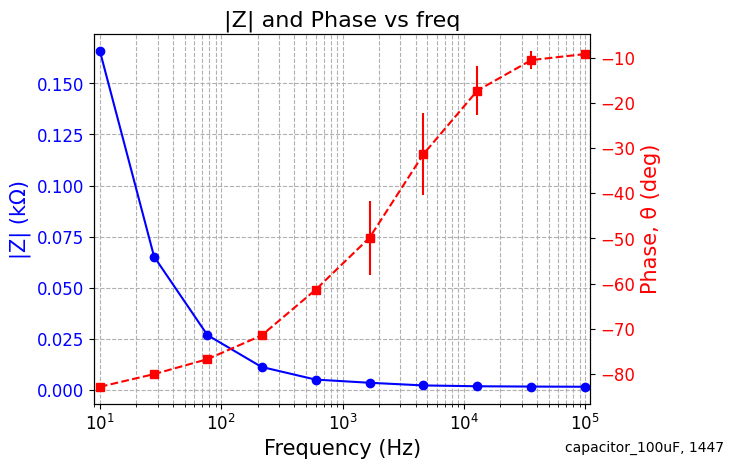

In [4]:
fig, ax1 = plt.subplots()

# Left Y-axis (Major param)
ax1.errorbar(
    dataFrame['Frequency'], dataFrame['Z Avg.']/1000, yerr=dataFrame['Z Std.']/1000,
    fmt='o-', color='blue')
ax1.set_xlabel('Frequency (Hz)',fontsize=15)
ax1.set_ylabel('|Z| (kΩ)', color='blue',fontsize=15)
ax1.set_xscale('log')
ax1.set_xlim(freq[0]*0.9, freq[-1]*1.1)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.text(0.95, -0.13, f'{material}, {timestamp}',
         transform=ax1.transAxes, fontsize=10)

# Right y-axis (Minor param)
ax2 = ax1.twinx()
ax2.errorbar(
    dataFrame['Frequency'], dataFrame['Z-THR Avg.'], yerr=dataFrame['Z-THR Std.'],
    fmt='s--', color='red')
ax2.set_ylabel('Phase, θ (deg)', color='red', fontsize=15)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)

# 
ax1.grid(True, which='both', ls='--')
plt.title('|Z| and Phase vs freq',fontsize=16)
plt.show()